In [ ]:
import csv
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import warnings
#suppress warnings
warnings.filterwarnings('ignore')
# Set up the constants
mu_0 = 4 * math.pi * 1e-7  # Permeability of free space

# Set up the parameters for the data
I_values = np.arange(1,11)  # Values of I to use
R_values = np.linspace(1,10,100)  # Values of R to use

In [ ]:

# Create the header row for the CSV file
header_row = ['I', 'R', 'B']

# Create a list to store the rows of data
data_rows = []

# Loop over the I and R values and calculate the corresponding B values
for I in I_values:
    for R in R_values:
        B = mu_0 * I / (2 * math.pi * R)
        data_rows.append([I, R, B])

# Write the data to a CSV file
with open('biot_savart_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header_row)
    writer.writerows(data_rows)

data=data_rows
random.shuffle(data)

In [ ]:

# Split the data into training and testing sets
num_training_samples = 900
training_data = data[:num_training_samples]
testing_data = data[num_training_samples:]

# Create the regression models
linear_regression = LinearRegression()
decision_tree_regression = DecisionTreeRegressor(max_depth=5)
neural_network_regression = MLPRegressor(hidden_layer_sizes=(10, 10))
decision_tree_regression2 = DecisionTreeRegressor(max_depth=10)
knn = KNeighborsRegressor()
RFC=RandomForestRegressor()
# Fit the regression models iteratively
num_iterations = 90
train_sizes = range(10, num_training_samples, 10)
losses = []
for model in [linear_regression, decision_tree_regression, decision_tree_regression2, knn, RFC]:
    model_losses = []
    for train_size in train_sizes:
        X_train = np.array([[row[0], row[1]] for row in training_data[:train_size]])
        y_train = np.array([row[2] for row in training_data[:train_size]])
        model.fit(X_train, y_train)
        X_test = np.array([[row[0], row[1]] for row in testing_data])
        y_test = np.array([row[2] for row in testing_data])
        y_pred = model.predict(X_test)
        loss = mean_squared_error(y_test, y_pred)
        model_losses.append(loss)
    losses.append(model_losses)


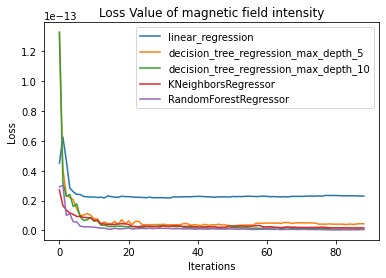

In [ ]:
# Plot model losses
modelss=["linear_regression", "decision_tree_regression_max_depth_5", "decision_tree_regression_max_depth_10", "KNeighborsRegressor", "RandomForestRegressor"]
for i, expert in enumerate(modelss):
    plt.plot(losses[i], label=f'{expert}')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of magnetic field intensity")
plt.legend(loc="upper right")

plt.show()


In [ ]:
# Predict on testing data using trained models, and calculate the test  mean square error of each model
X_test = np.array([[row[0], row[1]] for row in testing_data])
y_test = np.array([row[2] for row in testing_data])

for model in [linear_regression, decision_tree_regression, decision_tree_regression2, knn, RFC]:
  pred=model.predict(X_test)
  regression_mse = mean_squared_error(y_test, pred)
  print(f"{model} mean square error:", regression_mse)
  acc=0
  for i in range(len(pred)):
    if abs(pred[i]==y_test[i])<=0.1:
      acc+=1
  print(f"{model} accuracy:", acc/len(pred))



LinearRegression() mean square error: 2.2947600458674435e-14
LinearRegression() accuracy: 1.0
DecisionTreeRegressor(max_depth=5) mean square error: 4.429854065707043e-15
DecisionTreeRegressor(max_depth=5) accuracy: 1.0
DecisionTreeRegressor(max_depth=10) mean square error: 7.912725596429867e-16
DecisionTreeRegressor(max_depth=10) accuracy: 1.0
KNeighborsRegressor() mean square error: 1.6689332433663512e-15
KNeighborsRegressor() accuracy: 1.0
RandomForestRegressor() mean square error: 4.871469157323864e-16
RandomForestRegressor() accuracy: 1.0


In [ ]:
I_losses = []
for model in [linear_regression, decision_tree_regression, decision_tree_regression2, knn, RFC]:
    model_losses = []
    for train_size in train_sizes:
        X_train = np.array([[row[2], row[1]] for row in training_data[:train_size]])
        y_train = np.array([row[0] for row in training_data[:train_size]])
        model.fit(X_train, y_train)
        X_test = np.array([[row[2], row[1]] for row in testing_data])
        y_test = np.array([row[0] for row in testing_data])
        y_pred = model.predict(X_test)
        loss = mean_squared_error(y_test, y_pred)
        model_losses.append(loss)
    I_losses.append(model_losses)

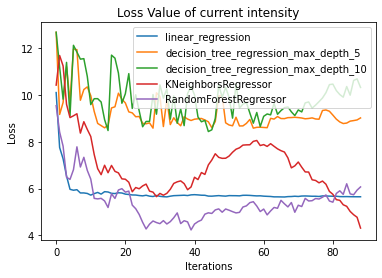

In [ ]:
# Plot model losses
modelss=["linear_regression", "decision_tree_regression_max_depth_5", "decision_tree_regression_max_depth_10", "KNeighborsRegressor", "RandomForestRegressor"]
for i, expert in enumerate(modelss):
    plt.plot(I_losses[i], label=f'{expert}')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of current intensity")
plt.legend(loc="upper right")

plt.show()

In [ ]:
# Predict on testing data using trained models, and calculate the test mean square error of each model
X_test = np.array([[row[2], row[1]] for row in testing_data])
y_test = np.array([row[0] for row in testing_data])

for model in [linear_regression, decision_tree_regression, decision_tree_regression2, knn, RFC]:
  pred=model.predict(X_test)
  regression_mse = mean_squared_error(y_test, pred)
  print(f"{model} mean square error:", regression_mse)
  acc=0
  for i in range(len(pred)):
    if abs(pred[i]-y_test[i])<=0.1:
      acc+=1
  print(f"{model} accuracy:", acc/len(pred))



LinearRegression() mean square error: 5.650059196165928
LinearRegression() accuracy: 0.05
DecisionTreeRegressor(max_depth=5) mean square error: 9.018794427252436
DecisionTreeRegressor(max_depth=5) accuracy: 0.0
DecisionTreeRegressor(max_depth=10) mean square error: 10.322481897798767
DecisionTreeRegressor(max_depth=10) accuracy: 0.01
KNeighborsRegressor() mean square error: 4.3124
KNeighborsRegressor() accuracy: 0.01
RandomForestRegressor() mean square error: 6.0704405012178135
RandomForestRegressor() accuracy: 0.09
